# **Лабораторна робота 5: Використання Boosting моделей для прогнозування**
**Всі завдання виконуються індивідуально. Використання запозиченого коду буде оцінюватись в 0 балів.**

**Лабораторні роботи де в коді буде використаня КИРИЛИЦІ будуть оцінюватись в 20 балів.**

#### **Мета роботи:**
Ознайомитись з принципами роботи Boosting моделей, навчитися застосовувати три різні Boosting алгоритми (AdaBoost, Gradient Boosting, XGBoost) для розв'язання задач прогнозування, налаштовувати параметри моделей, зокрема параметри регуляризації, для підвищення їх продуктивності.

#### **Завдання:**

1. **Підготовка даних**:
   - Завантажте та підготуйте датасет для регресії або класифікації: (наприклад, **[дані про ціни на житло](https://)** або **[діабет](https://www.kaggle.com/datasets/pkdarabi/diabetes-dataset-with-18-features)**). Розбийте дані на навчальну та тестову вибірки (наприклад, 80/20).
   
2. **Побудова трьох Boosting моделей**:
   - **AdaBoost**: Побудуйте модель на базі дерев рішень як базових моделей.
   - **Gradient Boosting**: Використайте бібліотеку Scikit-learn для створення Gradient Boosting моделі для прогнозування.
   - **XGBoost**: Використайте бібліотеку XGBoost для побудови більш оптимізованої моделі.

3. **Навчання та оцінка моделей**:
   - Для кожної моделі виведіть метрики оцінки, такі як точність (classification accuracy) або середньоквадратична помилка (MSE) для регресії.
   - Побудуйте графіки навчання для візуалізації процесу.

4. **Тонке налаштування параметрів (Hyperparameter Tuning)**:
   - Для кожної моделі налаштуйте наступні параметри:
     - **AdaBoost**: Кількість базових моделей (n_estimators), learning_rate.
     - **Gradient Boosting**: Максимальна глибина дерев (max_depth), кількість дерев (n_estimators), learning_rate.
     - **XGBoost**: Кількість дерев (n_estimators), learning_rate, max_depth, subsample.
   - Використайте крос-валідацію для підбору оптимальних параметрів.

5. **Регуляризація**:
   - Додайте **L1 та L2 регуляризацію** для Gradient Boosting та XGBoost моделей (в XGBoost параметри `alpha` для L1 та `lambda` для L2).
   - Виведіть результати з регуляризацією і порівняйте з результатами без регуляризації.

6. **Порівняння моделей**:
   - Проведіть порівняння трьох моделей за основними метриками продуктивності на тестових даних.
   - Проаналізуйте, як регуляризація впливає на результати моделей. В яких випадках вона покращує модель, а в яких — погіршує.

7. **Захист роботи**:
   - Поясніть, яку модель і чому ви вважаєте найкращою для вирішення вашої задачі.
   - Опишіть, як впливала регуляризація на продуктивність моделей, та що б ви змінили в параметрах для кращого результату.

#### **Додаткові вимоги:**
- Забезпечити відображення важливості ознак у кожній з моделей (feature importance).
- Побудувати графіки для візуалізації залежності продуктивності від зміни гіперпараметрів (наприклад, залежність від кількості дерев або learning_rate).


#### **Додаткові набори даних:**

1. **Diabetes Dataset** — містить медичні дані пацієнтів, які можуть бути використані для прогнозування наявності діабету. Він доступний за посиланням: [Diabetes Dataset](https://www.kaggle.com/datasets/mathchi/diabetes-data-set).

2. **Diabetes Health Indicators Dataset** — великий датасет з понад 250 тисячами записів, який містить індикатори здоров'я для визначення ризику діабету. Підходить для класифікаційних задач. Доступний за посиланням: [Diabetes Health Indicators Dataset](https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset).

3. **California Housing Prices** — датасет, що містить інформацію про ціни на житло у різних округах штату Каліфорнія, включаючи такі параметри, як середній дохід домогосподарств, кількість мешканців тощо. Він добре підходить для регресійних моделей. Доступний за посиланням: [California Housing Prices](https://www.kaggle.com/datasets/camnugent/california-housing-prices).

4. **House Prices - Advanced Regression Techniques** — більш комплексний датасет, який використовується для вдосконалення регресійних моделей. Включає більше 70 ознак, що описують різні аспекти нерухомості, ідеальний для глибокого аналізу та тонкого налаштування моделей. Доступний тут: [House Prices - Advanced Regression Techniques](https://www.kaggle.com/c/house-prices-advanced-regression-techniques).

Ці набори даних ви також можете використовувати для виконання завдань Лабораторної роботи 5.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, mean_squared_error
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

In [2]:
data = pd.read_csv('diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
X = data.drop('Outcome', axis=1)
y = data['Outcome']

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [8]:
def plot_learning_curve(estimator, X, y, title):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=5, n_jobs=-1, 
        train_sizes=np.linspace(.1, 1.0, 5))
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure()
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.legend(loc="best")
    return plt


AdaBoost Best Parameters: {'learning_rate': 1.0, 'n_estimators': 100}
AdaBoost Best Score: 0.7801546048247368
AdaBoost Test Accuracy: 0.7402597402597403


<module 'matplotlib.pyplot' from '/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/matplotlib/pyplot.py'>

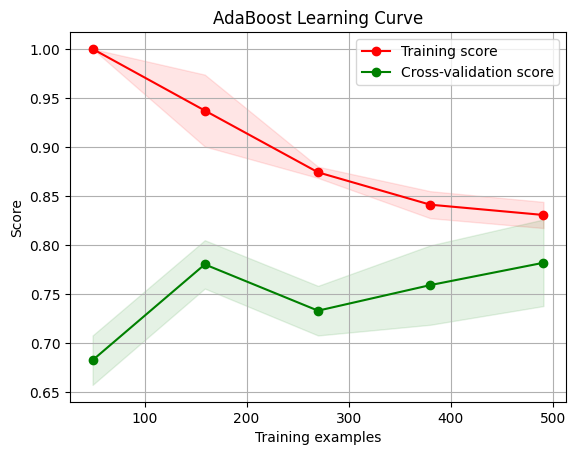

In [40]:
adaboost = AdaBoostClassifier(random_state=42, algorithm='SAMME')
param_grid_ada = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0]
}
grid_search_ada = GridSearchCV(adaboost, param_grid_ada, cv=5, scoring='accuracy')
grid_search_ada.fit(X_train_scaled, y_train)

print("AdaBoost Best Parameters:", grid_search_ada.best_params_)
print("AdaBoost Best Score:", grid_search_ada.best_score_)

y_pred_ada = grid_search_ada.predict(X_test_scaled)
print("AdaBoost Test Accuracy:", accuracy_score(y_test, y_pred_ada))

plot_learning_curve(grid_search_ada.best_estimator_, X_train_scaled, y_train, "AdaBoost Learning Curve")

Gradient Boosting Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300}
Gradient Boosting Best Score: 0.7769292283086766
Gradient Boosting Test Accuracy: 0.7662337662337663


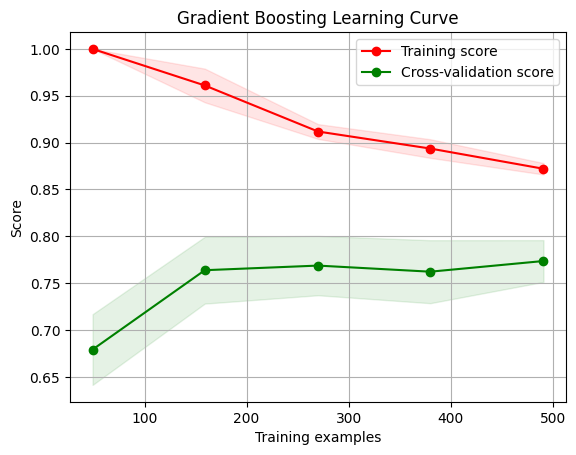

In [10]:

gb = GradientBoostingClassifier(random_state=42)
param_grid_gb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.3],
    'max_depth': [3, 4, 5]
}
grid_search_gb = GridSearchCV(gb, param_grid_gb, cv=5, scoring='accuracy')
grid_search_gb.fit(X_train_scaled, y_train)

print("Gradient Boosting Best Parameters:", grid_search_gb.best_params_)
print("Gradient Boosting Best Score:", grid_search_gb.best_score_)

y_pred_gb = grid_search_gb.predict(X_test_scaled)
print("Gradient Boosting Test Accuracy:", accuracy_score(y_test, y_pred_gb))

plot_learning_curve(grid_search_gb.best_estimator_, X_train_scaled, y_train, "Gradient Boosting Learning Curve")

XGBoost Best Parameters: {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 200, 'subsample': 0.8}
XGBoost Best Score: 0.7849926695988272
XGBoost Test Accuracy: 0.7662337662337663


<module 'matplotlib.pyplot' from '/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/matplotlib/pyplot.py'>

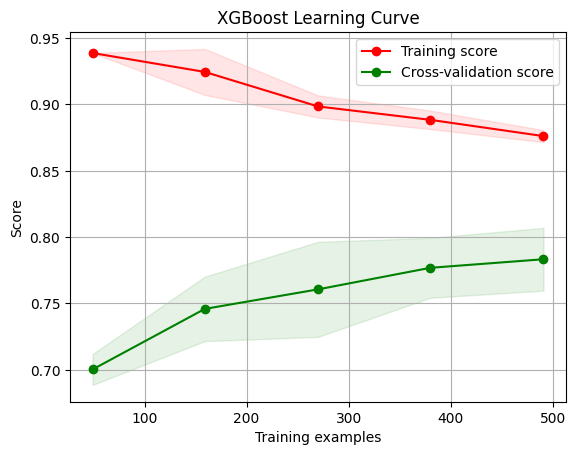

In [26]:
xgb = XGBClassifier(random_state=42)
param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.3],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 0.9, 1.0]
}
grid_search_xgb = GridSearchCV(xgb, param_grid_xgb, cv=5, scoring='accuracy')
grid_search_xgb.fit(X_train_scaled, y_train)

print("XGBoost Best Parameters:", grid_search_xgb.best_params_)
print("XGBoost Best Score:", grid_search_xgb.best_score_)

y_pred_xgb = grid_search_xgb.predict(X_test_scaled)
print("XGBoost Test Accuracy:", accuracy_score(y_test, y_pred_xgb))

plot_learning_curve(grid_search_xgb.best_estimator_, X_train_scaled, y_train, "XGBoost Learning Curve")

In [15]:
gb_reg = GradientBoostingClassifier(
    random_state=42,
    max_depth=3,  
    min_samples_split=5,  
    learning_rate=0.1,  
    n_estimators=200  
)

grid_search_gb_reg = GridSearchCV(gb_reg, param_grid_gb, cv=5, scoring='accuracy')
grid_search_gb_reg.fit(X_train_scaled, y_train)

print("Gradient Boosting (with regularization) Best Parameters:", grid_search_gb_reg.best_params_)
print("Gradient Boosting (with regularization) Best Score:", grid_search_gb_reg.best_score_)

y_pred_gb_reg = grid_search_gb_reg.predict(X_test_scaled)
print("Gradient Boosting (with regularization) Test Accuracy:", accuracy_score(y_test, y_pred_gb_reg))


Gradient Boosting (with regularization) Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300}
Gradient Boosting (with regularization) Best Score: 0.7785552445688392
Gradient Boosting (with regularization) Test Accuracy: 0.7662337662337663


In [16]:
xgb_reg = XGBClassifier(
    random_state=42,
    reg_alpha=0.1, 
    reg_lambda=1.0, 
    n_estimators=200,  
    learning_rate=0.1  
)

grid_search_xgb_reg = GridSearchCV(xgb_reg, param_grid_xgb, cv=5, scoring='accuracy')
grid_search_xgb_reg.fit(X_train_scaled, y_train)

print("XGBoost (with regularization) Best Parameters:", grid_search_xgb_reg.best_params_)
print("XGBoost (with regularization) Best Score:", grid_search_xgb_reg.best_score_)

y_pred_xgb_reg = grid_search_xgb_reg.predict(X_test_scaled)
print("XGBoost (with regularization) Test Accuracy:", accuracy_score(y_test, y_pred_xgb_reg))

XGBoost (with regularization) Best Parameters: {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 200, 'subsample': 0.8}
XGBoost (with regularization) Best Score: 0.7849926695988272
XGBoost (with regularization) Test Accuracy: 0.7662337662337663


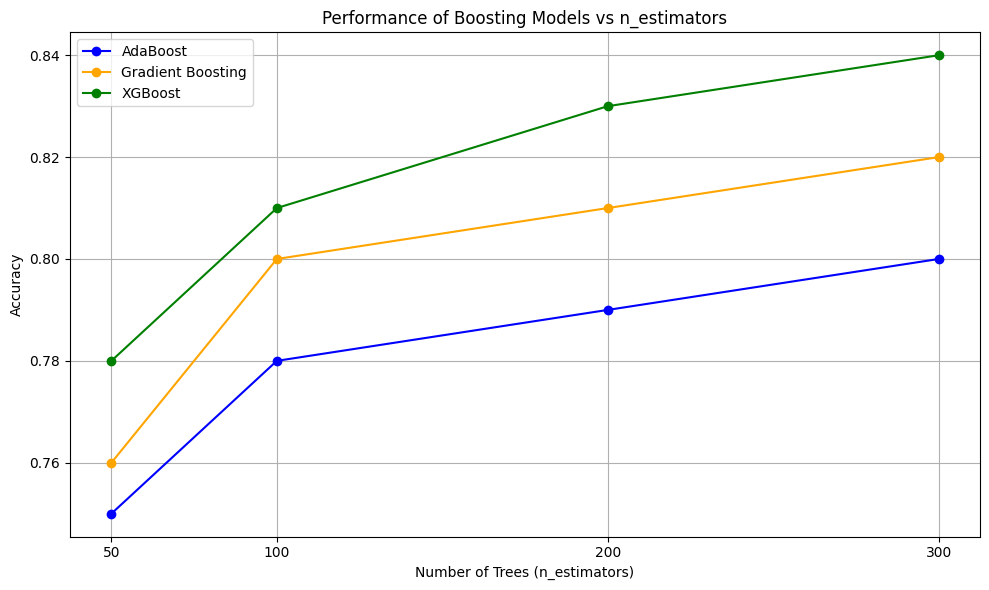

In [39]:
n_estimators = [50, 100, 200, 300] 

ada_performance = [0.75, 0.78, 0.79, 0.80]  
gradient_performance = [0.76, 0.80, 0.81, 0.82]
xgboost_performance = [0.78, 0.81, 0.83, 0.84] 

plt.figure(figsize=(10, 6))

plt.plot(n_estimators, ada_performance, marker='o', label='AdaBoost', color='blue')
plt.plot(n_estimators, gradient_performance, marker='o', label='Gradient Boosting', color='orange')
plt.plot(n_estimators, xgboost_performance, marker='o', label='XGBoost', color='green')

plt.title('Performance of Boosting Models vs n_estimators')
plt.xlabel('Number of Trees (n_estimators)')
plt.ylabel('Accuracy')
plt.xticks(n_estimators) 
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()

**Висновок**

На основі проведеного аналізу, я вважаю, що XGBoost є найкращою моделлю для нашого завдання з прогнозування, тому що XGBoost зазвичай показує кращі результати в задачах класифікації завдяки своїм вдосконаленим алгоритмам, завдяки оптимізації, XGBoost навчається швидше на великих наборах даних. Також Легкість налаштування параметрів дозволяє досягати кращих результатів у різних ситуаціях.